### Capstone 1: White Wine Quality, UC Irvine
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)

# White Wine Quality
## Random Forest Regression, Raw, Outliers In
#### Audrey Hughes Rager
#### February 19, 2021




## Import Python Packages

In [14]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


## Data Wrangling

### Import data

In [15]:
#Import csv files into Pandas data frames
#reddf = pd.read_csv('winequality-red.csv',sep=";")
#whitedf = pd.read_csv('whitewinebalanced.csv',sep=";")
df = pd.read_csv('whitewinebalanced.csv',sep=",")


### Check for null values

In [16]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values.

### Inspect data

In [17]:
#Look at the first few records of combined white wine dataframe with new column
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.4              0.44         0.26             2.0      0.054   
1            6.9              0.41         0.33            10.1      0.043   
2            6.8              0.21         0.55            14.6      0.053   
3            7.6              0.30         0.40             2.2      0.054   
4            8.9              0.32         0.49             1.6      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 20.0                 180.0  0.99520  3.58       0.57   
1                 28.0                 152.0  0.99680  3.20       0.52   
2                 34.0                 159.0  0.99805  2.93       0.44   
3                 29.0                 175.0  0.99445  3.19       0.53   
4                 17.0                 131.0  0.99560  3.13       0.34   

   alcohol  quality  
0     10.0        5  
1      9.4        5  
2      9.2        5  
3      9.8        5  
4      9.4        5

In [18]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3500.000000       3500.000000  3500.000000     3500.000000   
mean        7.048095          0.303558     0.336582        5.696076   
std         0.829939          0.098434     0.098246        4.094446   
min         3.900000          0.080000     0.000000        0.600000   
25%         6.500000          0.240000     0.280000        2.500000   
50%         7.000000          0.290000     0.333333        4.933333   
75%         7.600000          0.346667     0.383333        7.600000   
max        14.200000          1.100000     1.230000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3500.000000          3500.000000           3500.000000  3500.000000   
mean      0.043550            36.141000            135.518000     0.993528   
std       0.020608            20.794606             41.865532     0.002661   
min       0.012000             2.000000             10.000000     0.987110   
25%       0.032333            24.333333            109.333333     0.991768   
50%       0.040333            34.000000            126.000000     0.993200   
75%       0.048667            42.416667            157.000000     0.995233   
max       0.290000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3500.000000  3500.000000  3500.000000  3500.000000  
mean      3.210572     0.482749    10.853345     6.000000  
std       0.131398     0.097201     1.207379     2.000286  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.120000     0.420000     9.833333     4.000000  
50%       3.210000     0.473333    10.800000     6.000000  
75%       3.300000     0.523333    11.866667     8.000000  
max       3.800000     1.080000    14.050000     9.000000

## EDA

### Histograms

In [19]:

df.groupby(['quality']).size()

quality
3    500
4    500
5    500
6    500
7    500
8    500
9    500
dtype: int64

In [20]:
n = 4898
qual_list = [3,4,5,6,7,8,9]
quant_list = [20,163,1457,2198,880,175,5]
j=0
for i in qual_list:
    proportion = quant_list[j]/ n
    print("quality " + str(i)+"; " + "n = " + str(quant_list[j])+ "; proportion = " + str(proportion)) 
    #print(j)
    j += 1
    

quality 3; n = 20; proportion = 0.004083299305839118
quality 4; n = 163; proportion = 0.03327888934258881
quality 5; n = 1457; proportion = 0.2974683544303797
quality 6; n = 2198; proportion = 0.44875459371171905
quality 7; n = 880; proportion = 0.17966516945692118
quality 8; n = 175; proportion = 0.03572886892609228
quality 9; n = 5; proportion = 0.0010208248264597796


In [21]:
n = 4898
qual_list = [3,4,5,6,7,8,9]
quant_list = [20,163,1457,2198,880,175,5]
j=0
sum = 0
for i in qual_list:
    proportion = round(quant_list[j]/ n,5)
    #print("quality " + str(i)+"; " + "n = " + str(quant_list[j])+ "; proportion = " + str(proportion)) 
    print(str(proportion))
    j += 1
    sum += proportion
#print(sum)


0.00408
0.03328
0.29747
0.44875
0.17967
0.03573
0.00102


In [22]:
n = 4898
qual_list = [3,4,5,6,7,8,9]
quant_list = [20,163,1457,2198,880,175,5]
j=0
sum = 0
for i in qual_list:
    proportion = round(quant_list[j]/ n,5)*100
    #print("quality " + str(i)+"; " + "n = " + str(quant_list[j])+ "; proportion = " + str(proportion)) 
    print(str(proportion))
    j += 1
    sum += proportion
print(sum)


0.40800000000000003
3.328
29.747
44.875
17.967
3.573
0.10200000000000001
100.0


Wine Quality


<AxesSubplot:xlabel='quality', ylabel='count'>

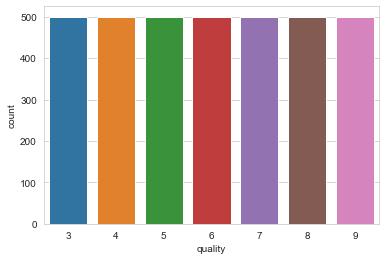

In [23]:
#Histogram of Wine Quality with Seaborn
print('Wine Quality')
sns.countplot(x='quality', data=df)

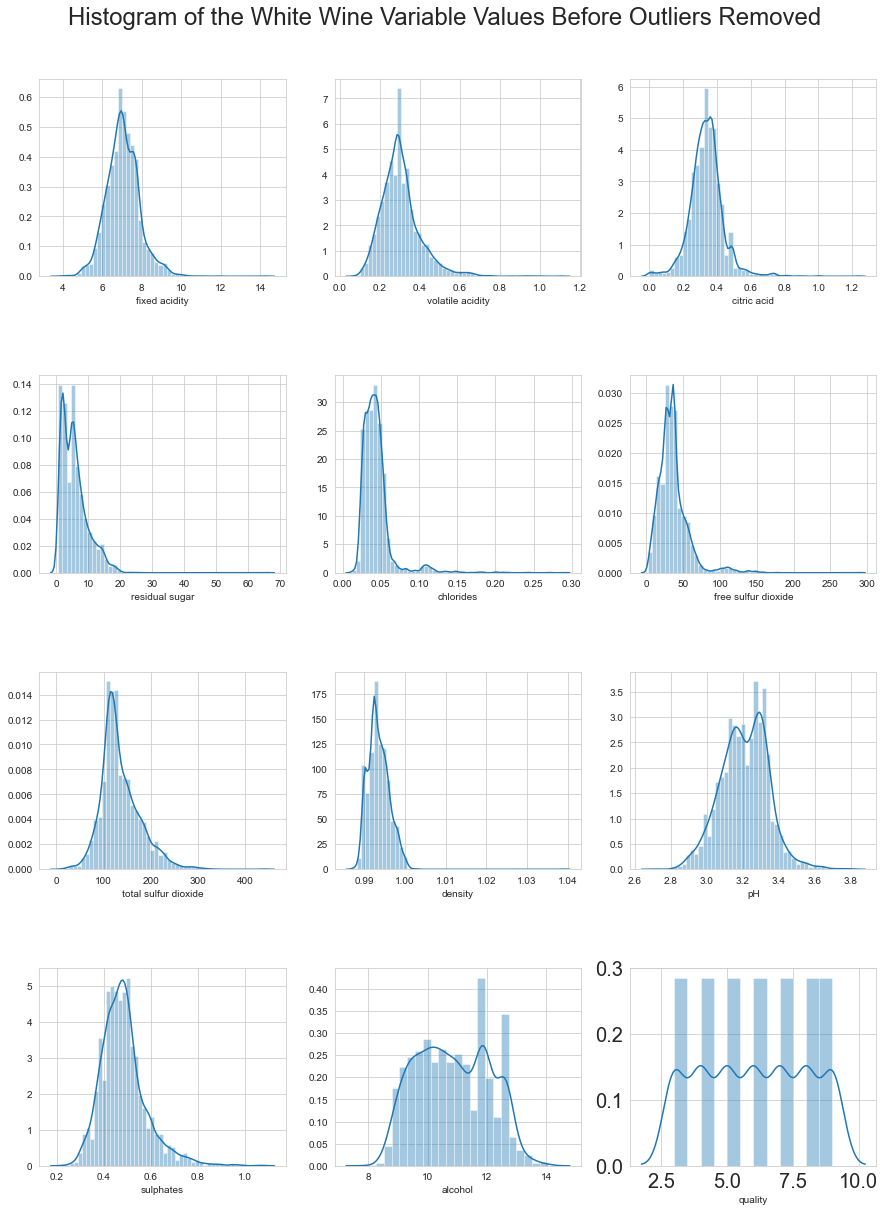

In [24]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['quality','fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol']
    


myhistplot = subplot_hist(df[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variable Values Before Outliers Removed")



### Boxplots

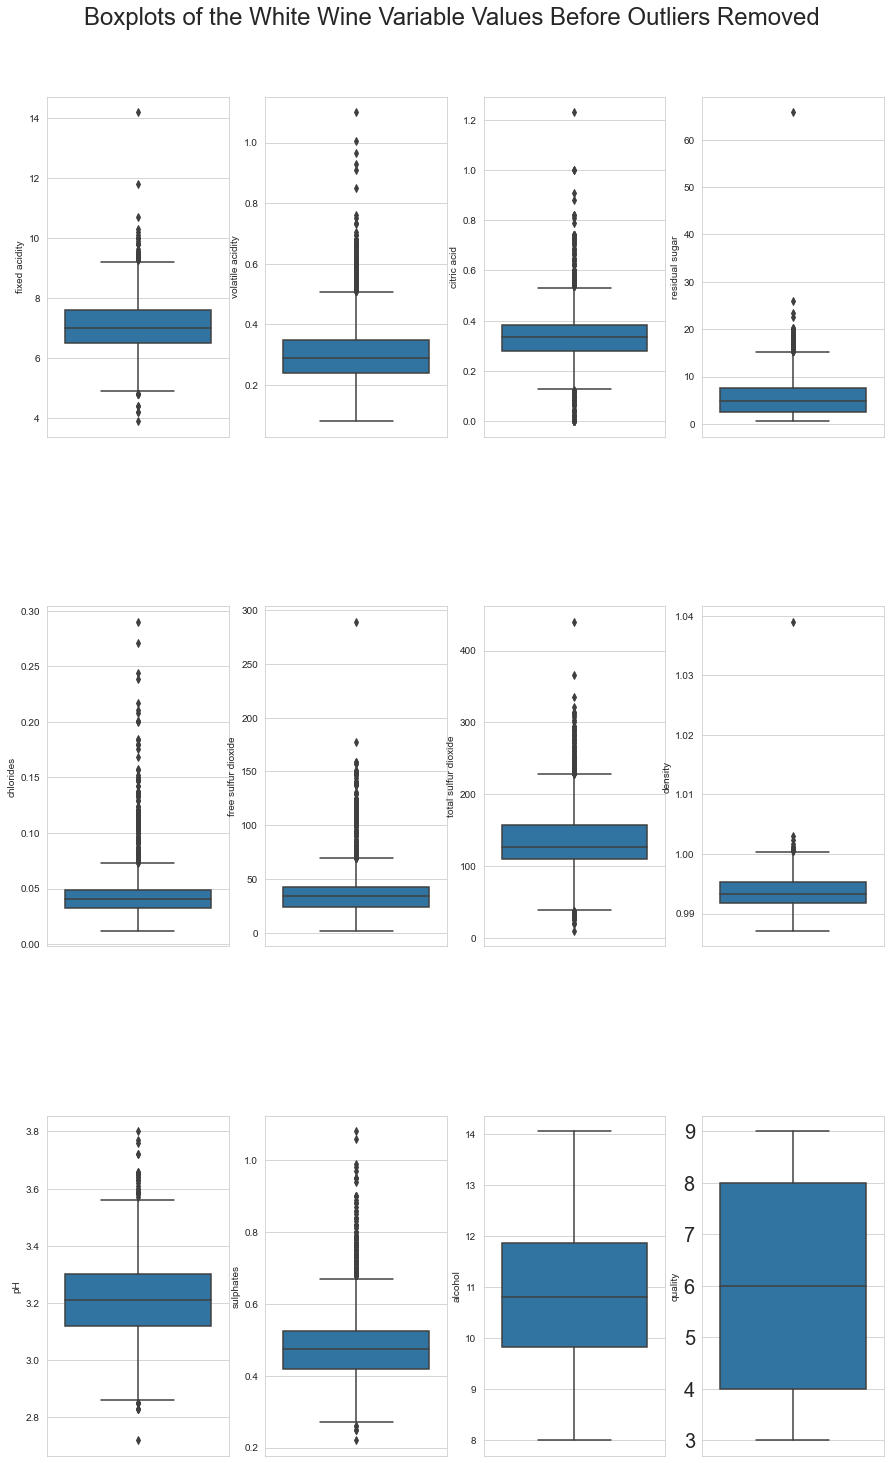

In [25]:
#Boxplots
def subplot_boxPlot(data, row = 3, column = 4, title = "Subplots", height = 25, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.boxplot(df.iloc[:, i], ax=ax, orient='v')
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myBoxplot = subplot_boxPlot(df[plot_columns], row = 3, column = 4, title = "Boxplots of the White Wine Variable Values Before Outliers Removed")



### Computing Skewness

In [26]:
plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    

# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skew")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('White Wine Skewness')

skewness_check(df[plot_columns])

White Wine Skewness


Column  Skewness   Skew Category
0          fixed acidity  0.502308  Heavily Skewed
1       volatile acidity  1.398279  Heavily Skewed
2            citric acid  0.779538  Heavily Skewed
3         residual sugar  1.907120  Heavily Skewed
4              chlorides  4.165757  Heavily Skewed
5    free sulfur dioxide  2.473399  Heavily Skewed
6   total sulfur dioxide  1.012191  Heavily Skewed
7                density  1.787065  Heavily Skewed
8                     pH  0.075295      Light Skew
9              sulphates  1.151686  Heavily Skewed
10               alcohol  0.091318      Light Skew
11               quality  0.000000      Light Skew

#### Observations regarding White Wine variables

<ul>
    <li>Most quality values are concentrated in the 5, 6 and 7 categories. A small proportion is in the categories 3, 4, 8, and 9.  No samples fall in the categories 1, 2 and 10.
    <li>Fixed acidity, volatile acidity and citric acid have outliers to the right (right skewed). Removing these outliers should make the distributions symmetrical.
    <li>Residual sugar has a positively skewed distribution; even after eliminating the outliers distribution will remain skewed.
    <li>Some of the variables, e.g . free sulphur dioxide, density, have a few outliers but these are very different from the rest.
    <li>Mostly outliers are on the larger (right) side.
    <li>Alcohol and density do not have a normal distriubition.  They both have irregular shaped distributions with one peak and two plateaus; Neither have pronounced outliers.


</ul>

 

### Correlation Matrices
#### Spearman

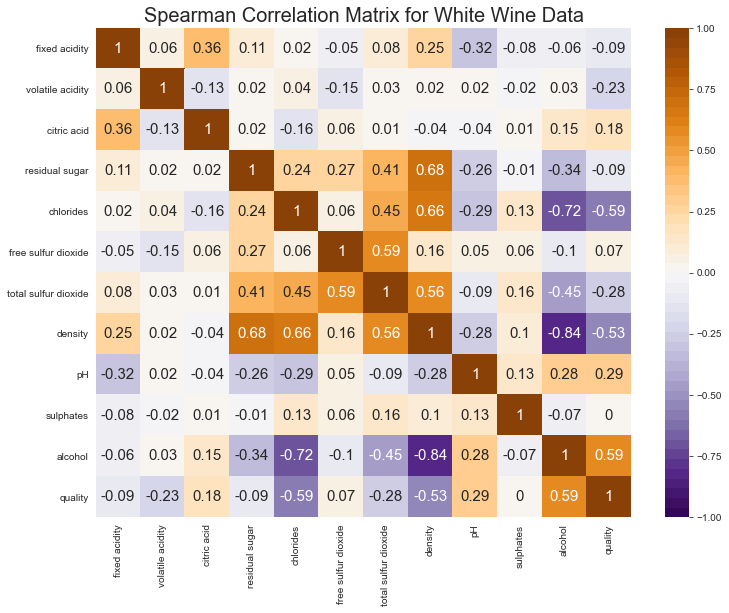

In [27]:
def confusion_matrix_plot(data, title = "Spearman Correlation Matrix for Wine Data Before Outliers Removed", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Spearman Correlation Matrix for White Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWineSpearmanBOD.png")





In [28]:
print("Spearman")
df.corr(method ="spearman")['quality'].sort_values(ascending=False)


Spearman


quality                 1.000000
alcohol                 0.593163
pH                      0.288089
citric acid             0.179565
free sulfur dioxide     0.071026
sulphates               0.003135
residual sugar         -0.092289
fixed acidity          -0.093232
volatile acidity       -0.227312
total sulfur dioxide   -0.279956
density                -0.530569
chlorides              -0.590543
Name: quality, dtype: float64

#### Pearson's

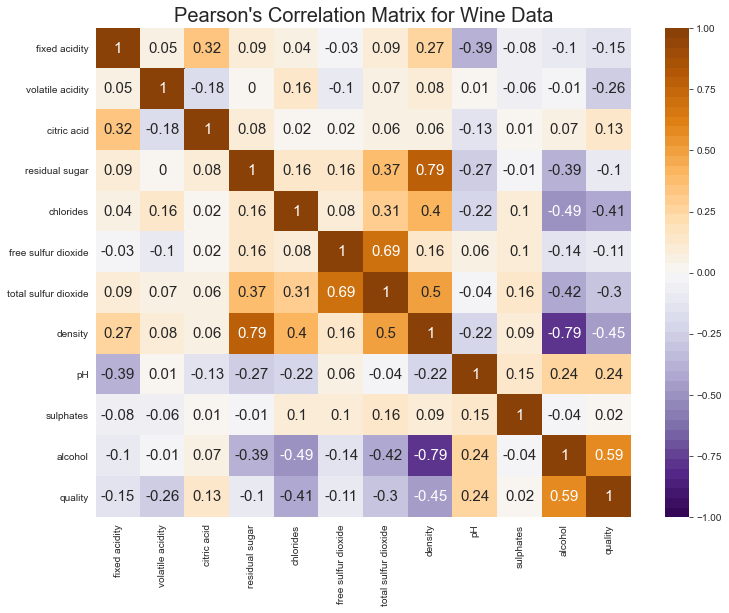

In [29]:
def confusion_matrix_plot(data, title = "Pearson's Correlation Matrix for White Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="pearson"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Pearson's Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWinePearsonsBOD.png")



In [30]:
print("Spearman")
df.corr(method ="pearson")['quality'].sort_values(ascending=False)


Spearman


quality                 1.000000
alcohol                 0.591089
pH                      0.242982
citric acid             0.127575
sulphates               0.019731
residual sugar         -0.103487
free sulfur dioxide    -0.108785
fixed acidity          -0.146343
volatile acidity       -0.255310
total sulfur dioxide   -0.304597
chlorides              -0.405467
density                -0.453917
Name: quality, dtype: float64

#### Kendall

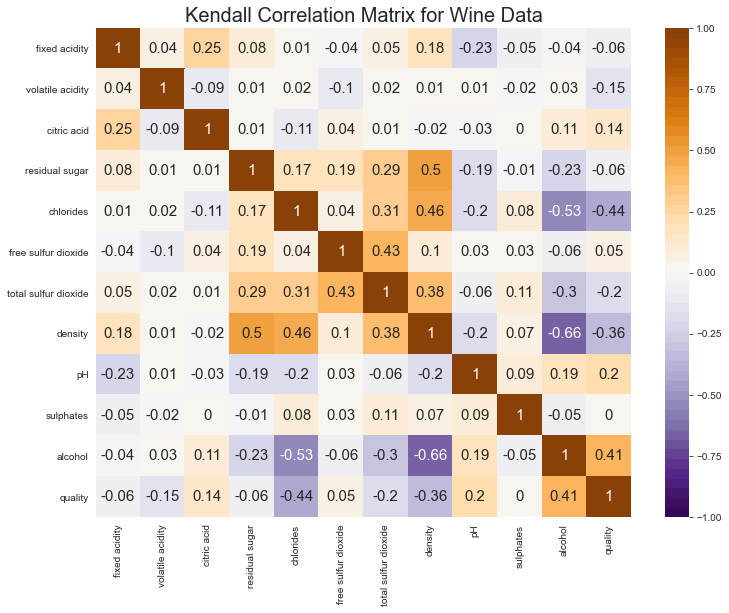

In [31]:
def confusion_matrix_plot(data, title = "Kendall Correlation Matrix for Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="kendall"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Kendall Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWineKendallBOD.png")



In [32]:
print("Kendall")
df.corr(method ="kendall")['quality'].sort_values(ascending=False)

Kendall


quality                 1.000000
alcohol                 0.412270
pH                      0.202997
citric acid             0.135758
free sulfur dioxide     0.048229
sulphates               0.003304
fixed acidity          -0.059547
residual sugar         -0.060892
volatile acidity       -0.150737
total sulfur dioxide   -0.204324
density                -0.363938
chlorides              -0.441746
Name: quality, dtype: float64

### Scatterplots of Predictors

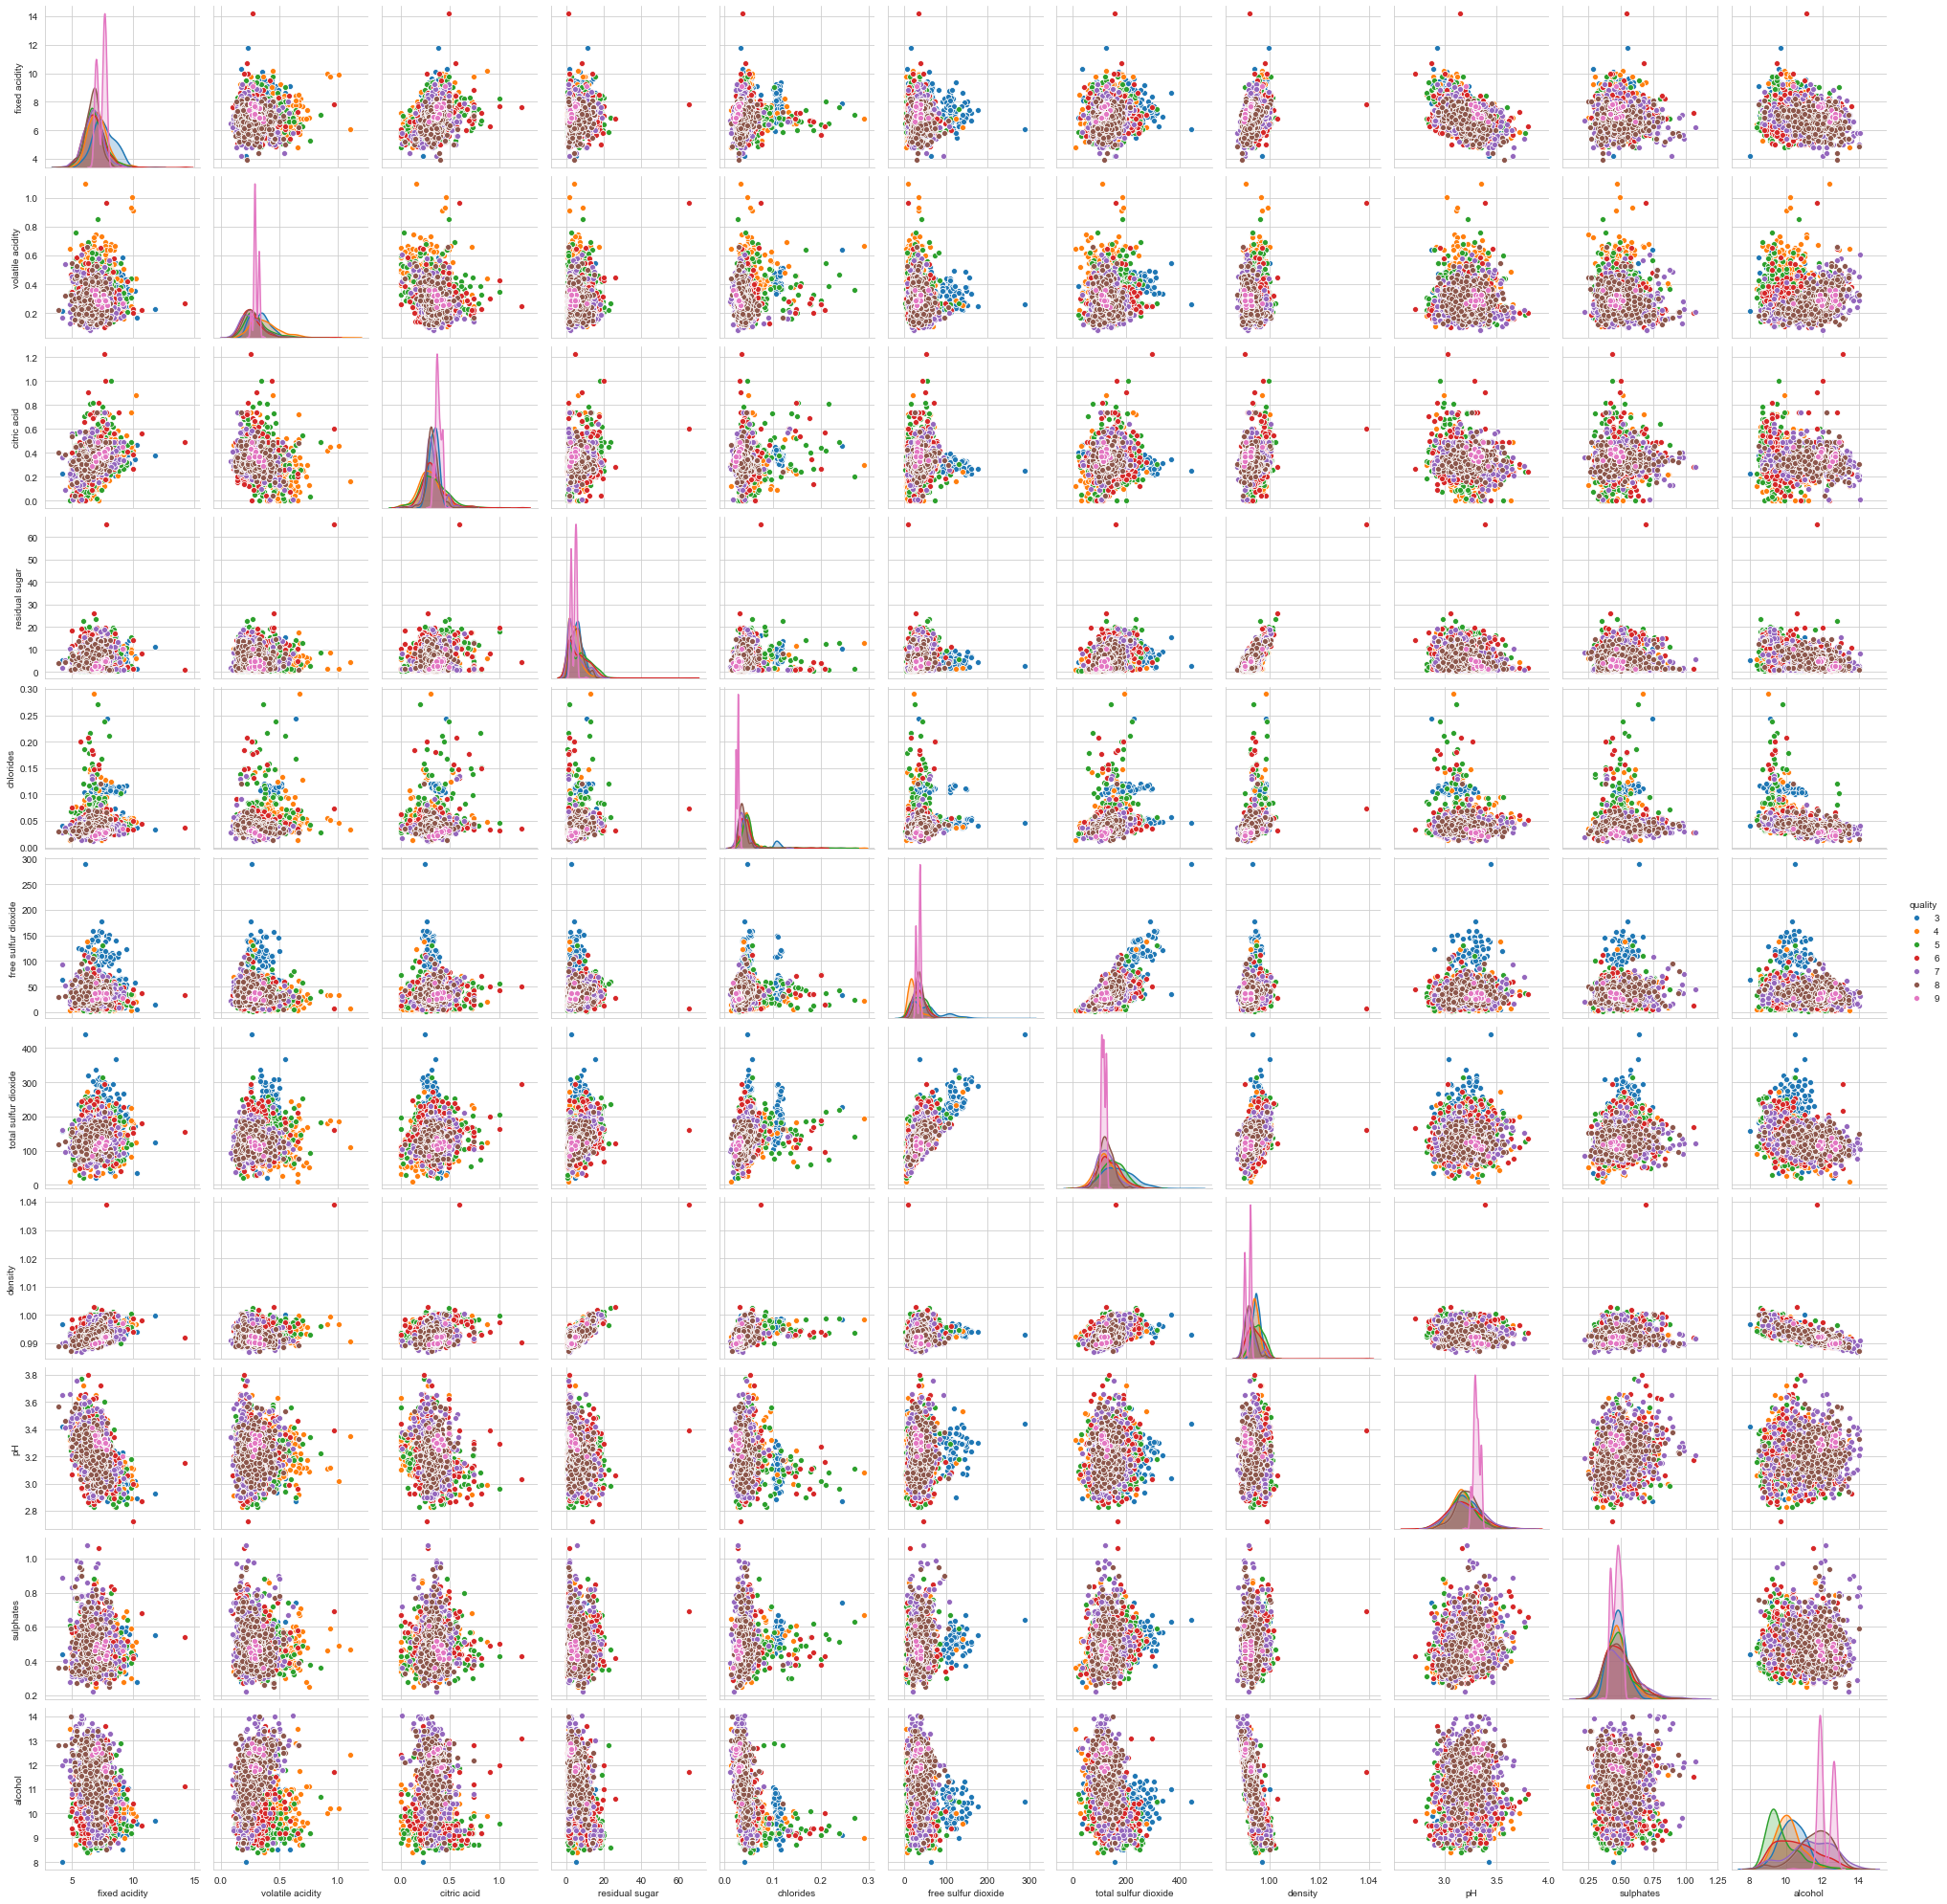

In [33]:
sns.pairplot(df,hue='quality')

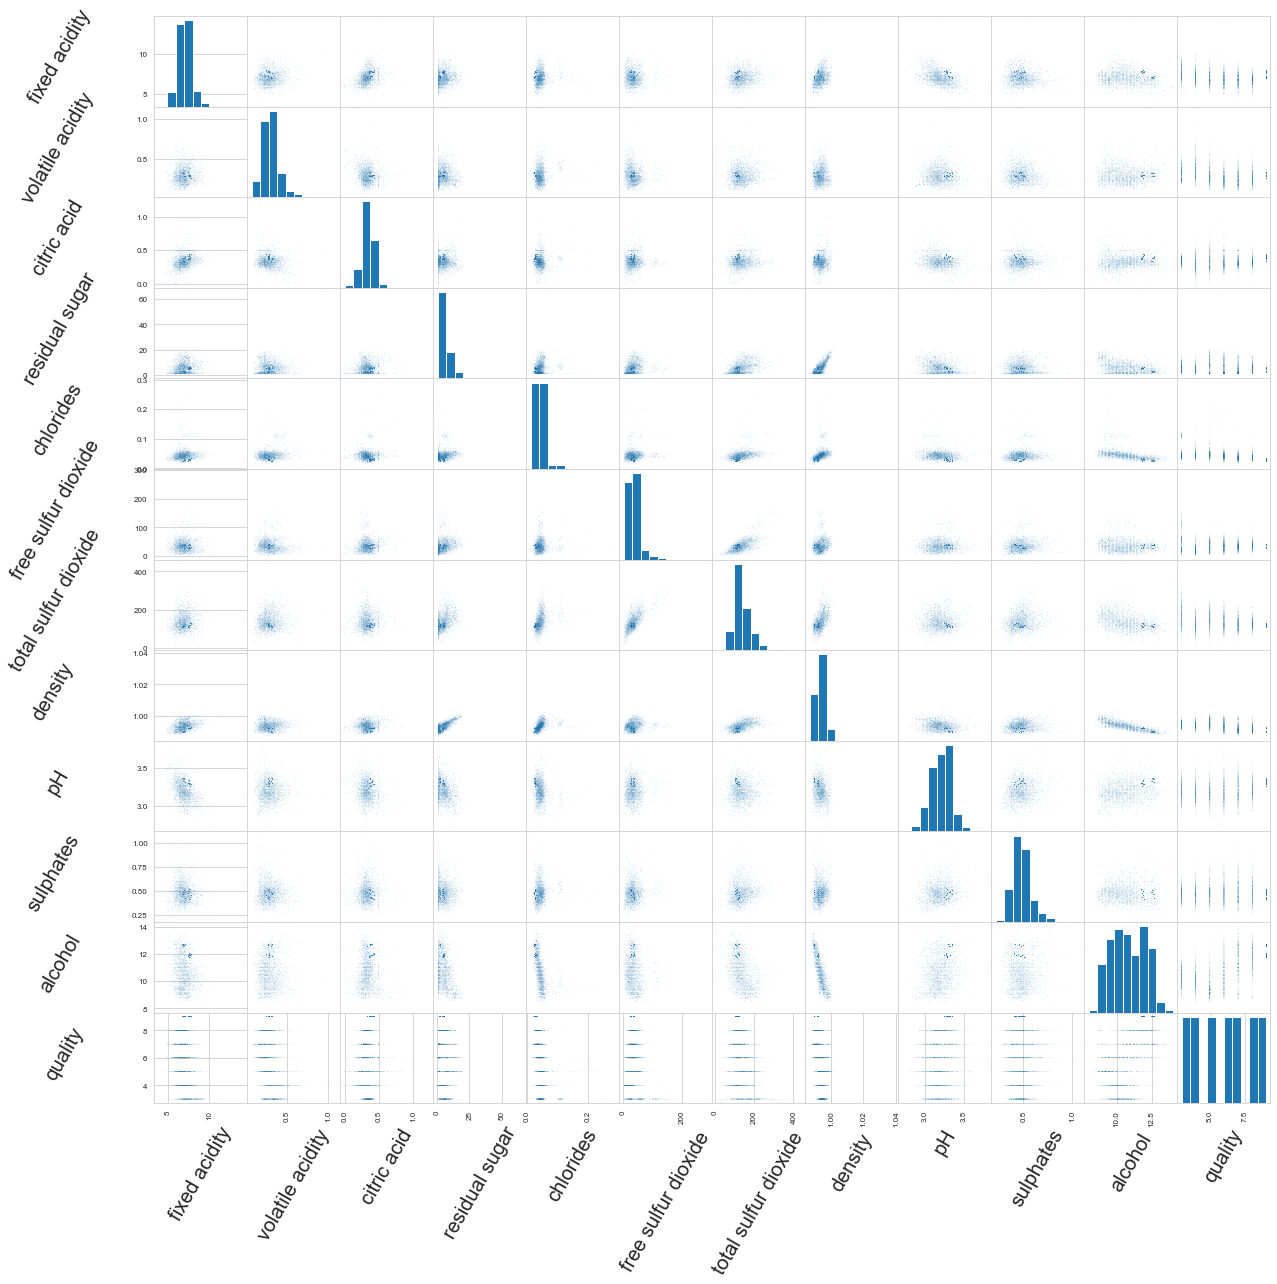

In [34]:
scatter_matrix = pd.plotting.scatter_matrix(
    df,
    figsize  = [20, 20],
    marker   = ".",
    s        = 0.5,
    diagonal = "hist",
    range_padding = 0.1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(), labelpad = 70, fontsize = 20, rotation = 60)
    

<h3>1. Alcohol</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Alcohol Percent'),
 Text(0.5, 1.0, 'Alcohol Percent by White Wine Quality Box Plots')]

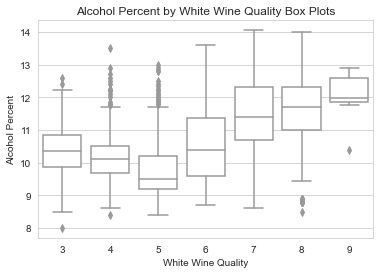

In [35]:
#Quality by Alcohol

myAttribute = 'alcohol'
myYLabel = 'Alcohol Percent'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>2. Density</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Density by White Wine Quality Box Plots')]

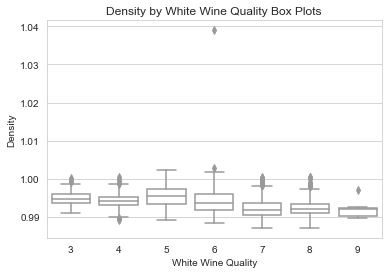

In [36]:
#Quality by Density

myAttribute = 'density'
myYLabel = 'Density'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>3. Chlorides</h3>    

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Chlorides'),
 Text(0.5, 1.0, 'Chlorides by White Wine Quality Box Plots')]

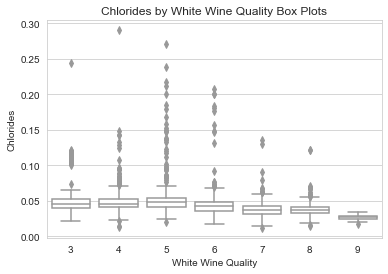

In [37]:
#Quality by Chlorides

myAttribute = 'chlorides'
myYLabel = 'Chlorides'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>4. Volatile Acidity</h3>      

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Volatile Acidity'),
 Text(0.5, 1.0, 'Volatile Acidity by White Wine Quality Box Plots')]

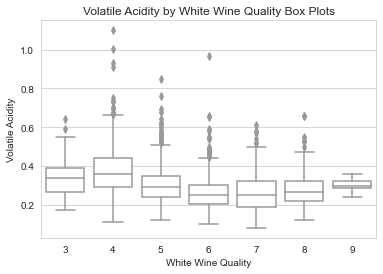

In [38]:
#Quality by Volatile Acidity


myAttribute = 'volatile acidity'
myYLabel = 'Volatile Acidity'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>5. Citric Acid</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Citric Acid'),
 Text(0.5, 1.0, 'Citric Acid by White Wine Quality Box Plots')]

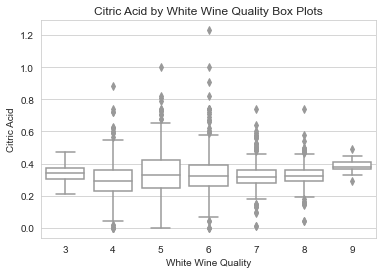

In [39]:
#Quality by Citric Acid

myAttribute = 'citric acid'
myYLabel = 'Citric Acid'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>6. Fixed Acidity</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Fixed Acidity'),
 Text(0.5, 1.0, 'Fixed Acidity by White Wine Quality Box Plots')]

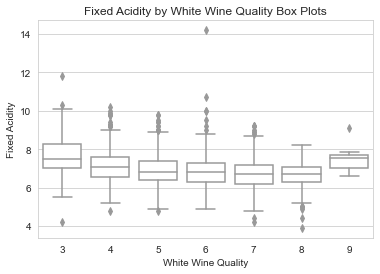

In [40]:
#Quality by Fixed Acidity

myAttribute = 'fixed acidity'
myYLabel = 'Fixed Acidity'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>7. Free Sulfur Dioxide</h3>  

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Free Sulfur Dioxide'),
 Text(0.5, 1.0, 'Free Sulfur Dioxide by White Wine Quality Box Plots')]

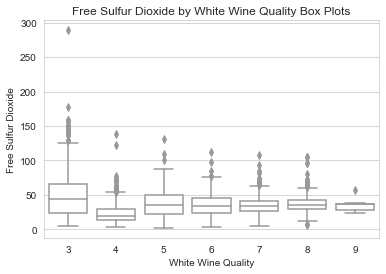

In [41]:
#Quality by Free Sulfur Dioxide

myAttribute = 'free sulfur dioxide'
myYLabel = 'Free Sulfur Dioxide'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>8. Total Sulfur Dioxide</h3> 

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Total Sulfur Dioxide'),
 Text(0.5, 1.0, 'Total Sulfur Dioxide by White Wine Quality Box Plots')]

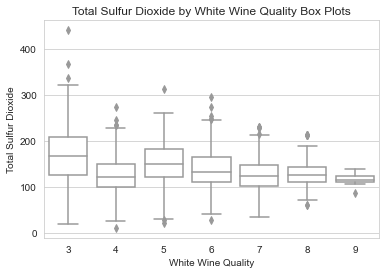

In [42]:
#Quality by Total Sulfur Dioxide

myAttribute = 'total sulfur dioxide'
myYLabel = 'Total Sulfur Dioxide'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>9. pH</h3> 

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'pH'),
 Text(0.5, 1.0, 'pH by White Wine Quality Box Plots')]

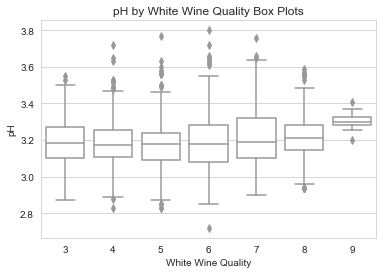

In [43]:
#Quality by pH

myAttribute = 'pH'
myYLabel = 'pH'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
 

<h3>10. Sulphates</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Sulphates'),
 Text(0.5, 1.0, 'Sulphates by White Wine Quality Box Plots')]

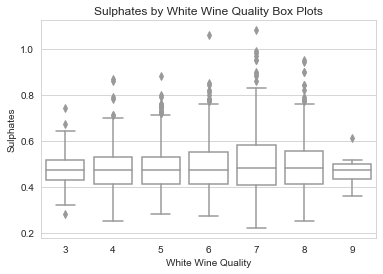

In [44]:
#Quality by Sulphates

myAttribute = 'sulphates'
myYLabel = 'Sulphates'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


<h3>11. Residual Sugar</h3>

[Text(0.5, 0, 'White Wine Quality'),
 Text(0, 0.5, 'Residual sugar'),
 Text(0.5, 1.0, 'Residual sugar by White Wine Quality Box Plots')]

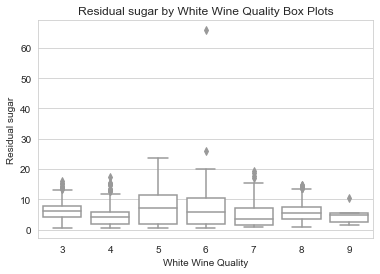

In [45]:
#Quality by Residual Sugar

myAttribute = 'residual sugar'
myYLabel = 'Residual sugar'

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')


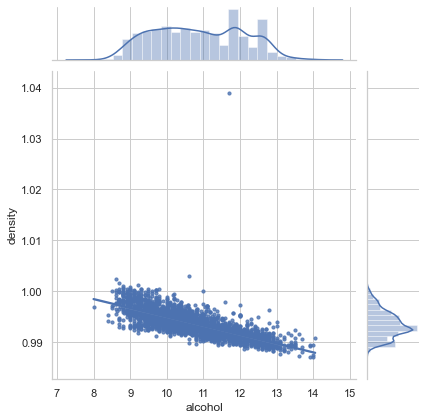

In [46]:
#Plot variables against eaach other
#Plot the histogram for alchol and density against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(data=df,x='alcohol', y='density',  kind='reg',scatter_kws={'s':10})
plt.show()


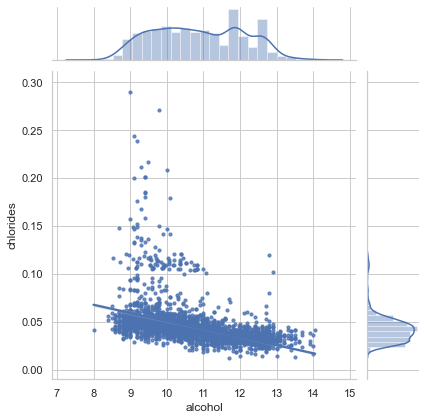

In [47]:
#Plot variables against eaach other
#Plot the histogram for alchol and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'chlorides', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

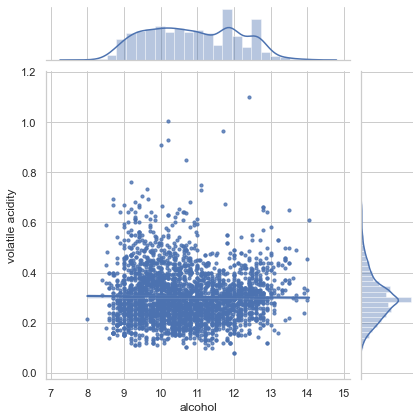

In [48]:
#Plot variables against eaach other
#Plot the histogram for alchol and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

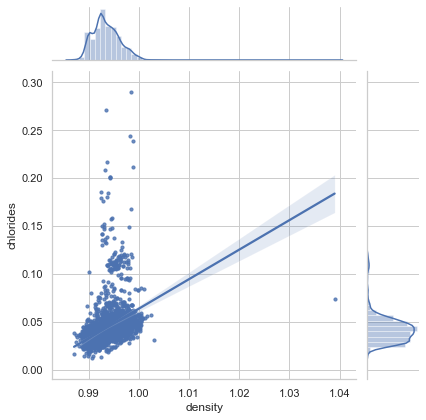

In [49]:
#Plot variables against eaach other
#Plot the histogram for density and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'chlorides', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

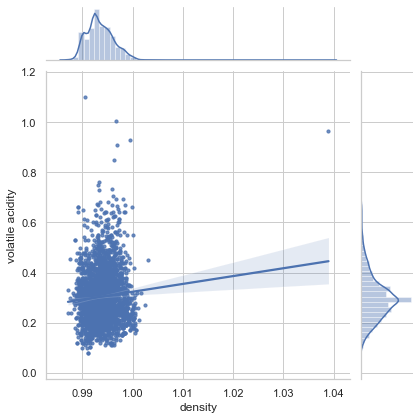

In [50]:
#Plot variables against eaach other
#Plot the histogram for density and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

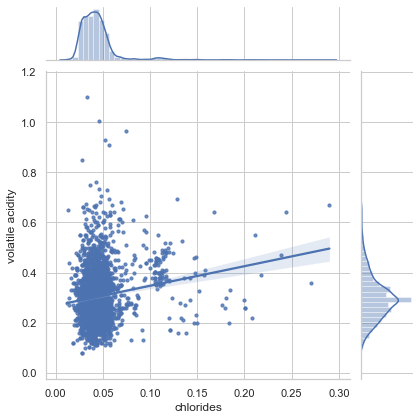

In [51]:
#Plot variables against eaach other
#Plot the histogram for chlorides and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('chlorides', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

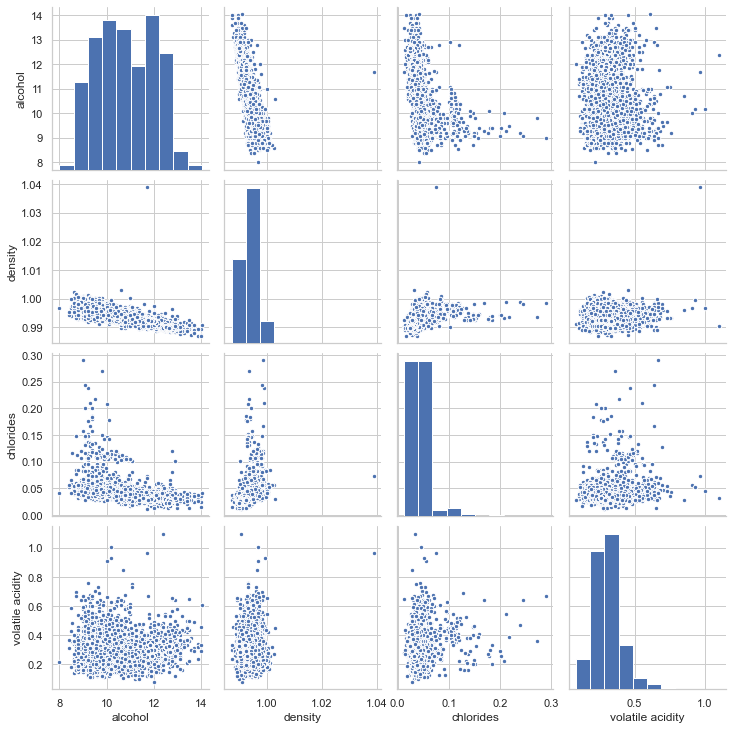

In [52]:

data = df[['alcohol', 'density', 'chlorides', 'volatile acidity']]

sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))

## Random Forest Regressor
### Import packages for analysis

In [53]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import mean_absolute_error, mean_squared_error

%matplotlib inline

sns.set_style('whitegrid')

### Train-Test-Split


In [54]:
#Independent variables (X) = everything but the target variable, y
#Target variable, y, is quality

#Set X to all the input variables (everything except 'quality')
X = df.drop('quality',axis=1)

#Set the variable to be predicted (y) to 'quality'
y = df['quality']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)


### Scale Independent Variables

In [56]:
# applying Standard Scaling to the dataset to scale all the field values to same scale (approx.).

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



### Instantiate the Random Forest Regressor

In [57]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth=20, min_samples_leaf=50, random_state = 42)

### Fit the Model to the Training Data

In [58]:
rfrModel = rfr.fit(X_train,y_train)

### Predict Using Test Data

In [59]:
y_pred = rfrModel.predict(X_test)

In [60]:
print(y_pred)

[3.8397687  4.24323155 4.9880035  3.87201342 4.64408432 4.40024345
 6.60490778 3.67570568 5.89577757 4.35788237 4.44453816 7.52644391
 8.77225923 5.72713068 6.95921691 4.97840477 5.77502335 7.48013456
 7.96870973 4.4418901  6.78503671 4.39863514 4.3859298  6.00207835
 5.34302688 6.81610533 4.12590155 4.81806395 5.31761275 8.77225923
 8.23537104 3.81262544 5.94705033 4.97097308 8.87309327 8.29606628
 4.02250232 4.68660389 3.88105222 4.58696679 4.02984694 8.23537104
 5.09976459 4.98723933 5.34910451 5.42147841 3.78895279 4.69320603
 6.4870012  6.18416288 3.9935954  4.82198781 7.27848188 8.84808423
 6.29539351 4.68660389 5.6029569  4.60578115 5.03617375 5.13077354
 8.96745752 6.62125356 6.29755037 4.80374988 3.27455292 8.84808423
 5.87959465 3.94568613 6.72361111 6.39216658 7.66261585 5.2621584
 5.45890385 6.112718   5.64247306 4.34082663 8.96745752 7.16262072
 8.23537104 4.50789986 8.77225923 8.78205316 8.77225923 8.23537104
 5.34282514 7.61837374 6.84162002 7.25402076 7.26122252 4.75369

In [61]:
print(rfr.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[4.60230657]


In [62]:
print(rfrModel.predict([[0,0,0,0,0,0,0,0,0,0,0]]))

[4.60230657]


### Evaluate the Model

In [63]:
mae_r = mean_absolute_error(y_test,y_pred)
mse_r = mean_squared_error(y_test,y_pred)

In [64]:
print("Mean Absolute Error (MAE):",round(mae_r,4))
print("Mean Squared Error (MSE):",round(mse_r,4))


Mean Absolute Error (MAE): 0.8249
Mean Squared Error (MSE): 1.2258


In [65]:
importance = rfrModel.feature_importances_
importance

array([0.05890081, 0.14192244, 0.00911441, 0.01698257, 0.01950758,
       0.08116682, 0.00242034, 0.00308186, 0.02723956, 0.0027617 ,
       0.63690191])

In [66]:
columns = X.columns

In [67]:
rfrGraph = pd.Series(importance,columns)
rfrGraph

fixed acidity           0.058901
volatile acidity        0.141922
citric acid             0.009114
residual sugar          0.016983
chlorides               0.019508
free sulfur dioxide     0.081167
total sulfur dioxide    0.002420
density                 0.003082
pH                      0.027240
sulphates               0.002762
alcohol                 0.636902
dtype: float64

[Text(0.5, 1.0, 'White Wine Quality - Random Forest Regressor Model Visualization (Outliers Not Removed)')]

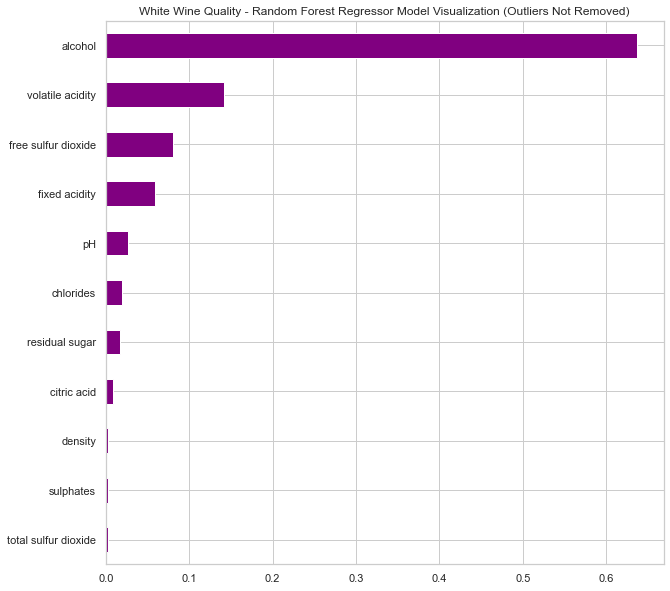

In [68]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10,10))

rfrGraph.sort_values().plot.barh(color="purple")

[plt.title("White Wine Quality - Random Forest Regressor Model Visualization (Outliers Not Removed)")]

Balanced, Outliers Not Removed


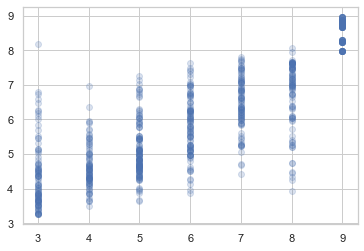

In [70]:
#Plot actual vs. predicted.
print("Balanced, Outliers Not Removed")

plt.scatter(y_test,y_pred,alpha=0.2)